In [1]:
from glob import glob
import numpy as np
import os

os.path.abspath(glob('Results/ROI_12_Layer_28/ROI_12_Layer_28_0_Vgg/*')[0])

import torch
from lucent.modelzoo import vgg19, util
from cadena_model_vgg import VggModel
from lucent.optvis import render, param, transform, objectives

vgg_pretrained = vgg19(pretrained = True)

gpu_to_use = 0
n_neurons = 29
layer = 12


GPU = torch.cuda.is_available()


#### ADDING EVAL() CHANGED EVERYTHING, BUT DOGS APPEARED AGAIN

net = VggModel(pretrained_model=vgg_pretrained, conv_layer=28, num_neurons=29, device = torch.device("cuda:"+str(gpu_to_use) if GPU else "cpu")).eval()
net.cuda()


#net.load_state_dict(torch.load('E:/Jose/models\\model_9_0_1668242975_epoch_2_loss_0.21454372439322444.pt', map_location=torch.device("cuda:"+str(gpu_to_use) if GPU else "cpu")))
#model_to_load = 'E:/Jose/Results/ROI_3_Layer_10/ROI_3_Layer_10_0/Vgg_model_3_10_epoch_19_loss_0.09356637168213405.pt'
model_to_load = '/home/jose/Desktop/lucent-things/Results/ROI_12_Layer_28/ROI_12_Layer_28_0_Vgg/Vgg_model_12_28_epoch_2_loss_0.03436415874376114_sparsity_0.001_smoothness_0.001_groupsparsity_0.01.pt'
net.load_state_dict(torch.load(model_to_load, map_location=torch.device("cuda:"+str(gpu_to_use) if GPU else "cpu")))

/home/jose/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jose/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


conv_layer:   28 <class 'int'>
FTE:          [0, 2, 5, 7, 10, 12, 14, 16, 19, 21, 23, 25, 28, 30, 32, 34]
conv in FTE True



features.28
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
[512, 14, 14, 29]


<All keys matched successfully>

100%|██████████| 512/512 [00:26<00:00, 19.41it/s]



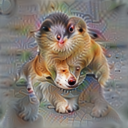
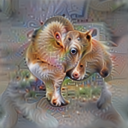
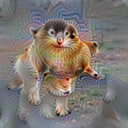
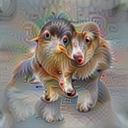
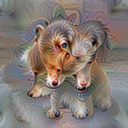

In [2]:
all_transforms = [ ## <--- parameters
#transform.pad(2),
transform.jitter(8),
transform.random_scale([n/1000. for n in range(975, 1050)]),
transform.random_rotate(list(range(-5,5))),
transform.jitter(4)
]

param_f = lambda: param.image(128, fft=True, batch = 5, decorrelate=True)
cppn_opt = lambda params: torch.optim.Adam(params, 1e-2, weight_decay=1e-4)
obj = objectives.channel('output', np.array(list(range(29))))
img = render.render_vis(net, obj, param_f, cppn_opt, transforms=all_transforms, show_inline=True)

100%|██████████| 512/512 [00:24<00:00, 20.81it/s]



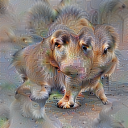
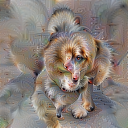
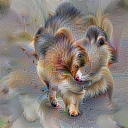
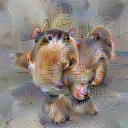
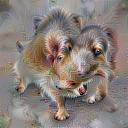

In [3]:
all_transforms = [ ## <--- parameters
#transform.pad(2),
#transform.jitter(17),
#transform.random_scale([n/1000. for n in range(975, 1050)]),
#transform.random_rotate(list(range(-5,5))),
#transform.jitter(4),
#transform.pad(1)
]

param_f = lambda: param.image(128, fft=True, batch = 5, decorrelate=True)
cppn_opt = lambda params: torch.optim.Adam(params, 1e-2, weight_decay=1e-4)
obj = objectives.channel('output', np.array(list(range(29))))
img = render.render_vis(net, obj, param_f, cppn_opt, transforms=all_transforms, show_inline=True)

In [4]:
all_transforms = [ ## <--- parameters
#transform.pad(2),
#transform.jitter(17),
#transform.random_scale([n/1000. for n in range(975, 1050)]),
#transform.random_rotate(list(range(-5,5))),
transform.jitter(12),
transform.random_scale([i/10 for i in range(0,10)])
]

param_f = lambda: param.image(128, fft=True, batch = 5, decorrelate=True)
cppn_opt = lambda params: torch.optim.Adam(params, 1e-2, weight_decay=1e-4)
obj = objectives.channel('output', np.array(list(range(29))))
img = render.render_vis(net, obj, param_f, cppn_opt, transforms=all_transforms, show_inline=True)

  3%|▎         | 16/512 [00:00<00:24, 20.33it/s]


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [8]:
dir(transform)

['F',
 'Normalize',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_rads2angle',
 '_roundup',
 'absolute_import',
 'adjust_contrast',
 'compose',
 'contrast',
 'device',
 'division',
 'fft',
 'jitter',
 'kornia',
 'lowpass',
 'norm',
 'normalize',
 'np',
 'pad',
 'preprocess_inceptionv1',
 'print_function',
 'random_rotate',
 'random_scale',
 'standard_transforms',
 'torch',
 'translate']